<p class="title">Confidence bounds via the Chebychev and Hoeffding Inequalities</p>

## Chebychev's inequality

<div class="theorem">
   Suppose $X$ has finite expected value $\mu$ and variance $\sigma^2$. Then
$$
  \mathbb P_\mu (| X - \mu | \ge k \sigma ) \le 1/k^2.
$$
</div>

### Using Chebychev's inequality for confidence intervals

Suppose that $\{X_j\}_{j=1}^n$ are independent random variables and $\{\ell_j\}_{j=1}^n$ and
$\{u_j\}_{j=1}^n$ are real numbers such that

$$\mathbb P (X_i \in [\ell_j, u_j]) = 1,  \forall j = 1, \ldots, n.$$
Let $\bar{X} \equiv \frac{1}{n} \sum_{j=1}^n X_j$, $\mu = \mathbb E \bar{X}$, and
$\tau^2 \equiv \sum_{j=1}^n (u_j - \ell_j)^2$.

Let's bound $\mbox{Var } X_j = \mathbb E (X_j - \mathbb E X_j)^2$. 
Intuitively, the variance is maximized by "spreading out" the distribution as much
as possible, which would mean putting mass 1/2 at $\ell_j$ and mass 1/2 at $u_j$.
(This is directly analogous to the fact that the variance of a Bernoulli distribution
is maximal when $p = 1/2$.)
The mean of the corresponding distribution is $(\ell_j + u_j)/2$, and the
variance is

$$ \frac{1}{2} \left ( \ell_j - (\ell_j + u_j)/2 \right )^2 + 
    \frac{1}{2} \left ( u_j - (\ell_j + u_j)/2 \right )^2
   = \frac{1}{2} \left ( \frac{\ell_j - u_j}{2} \right )^2 +
      \frac{1}{2} \left ( \frac{u_j - \ell_j}{2} \right )^2
$$
$$
   = \left ( \frac{\ell_j - u_j}{2} \right )^2
   = \frac{(u_j - \ell_j)^2}{4} .
$$
(As a sanity check, this variable is a shifted and scaled Bernoulli with $p=1/2$,
which has variance $1/4$. The shift doesn't affect the variance, and the scale factor is 
$u_j - \ell_j$, so the new variance should be $1/4 \times (u_j - \ell_j)^2$.)


Hence
$$ \mbox{Var } \bar{X} \equiv \sigma^2 = \frac{1}{n^2} \sum_{j=1}^n \mbox{Var }X_j  \le \frac{\tau^2}{4n^2}.$$


Since $\sigma \le \tau/(2n)$,
$$ \mathbb P_\mu \left (| \bar{X} - \mu | \ge k \frac{\tau}{2 n} \right )
  \le \mathbb P_\mu \left (| \bar{X} - \mu | \ge k \sigma \right )
  \le 1/k^2,
$$
and thus
$$ \mathbb P_\mu \left (| \bar{X} - \mu | \ge a \right )
  \le \frac{\tau^2}{4n^2 a^2}.
$$
This bound is trivial (because it is greater than 1) until
$$ 
   \frac{\tau^2}{4n^2 a^2} < 1,
$$
i.e.,
$$
   a > \frac{\tau}{2 n}.
$$


## Hoeffding's Inequality

<div class="theorem">
Let $\{X_j\}_{j=1}^n$ be independent random variables and $\{\ell_j\}_{j=1}^n$ and
$\{u_j\}_{j=1}^n$ be real numbers such that

$$\mathbb P (X_i \in [\ell_j, u_j]) = 1,  \forall j = 1, \ldots, n,$$

and define $\bar{X} \equiv \frac{1}{n} \sum_j X_j$, $\mu \equiv \mathbb E \bar{X}$, and 
$\tau^2 \equiv \sum_{j=1}^n (u_j - \ell_j)^2$.

<p class="gap01">
Then 
$$ 
   \mathbb P_\mu ( \bar{X} - \mu \ge a ) \le 
      \exp \left (-\frac{2n^2 a^2}{\tau^2} \right ) 
$$
and
$$
   \mathbb P_\mu ( |\bar{X} - \mu | \ge a ) \le  
         2 \exp \left(-\frac{2n^2 a^2}{\tau^2} \right ).
$$
</p>
</div>

This bound is useful once
$$ 
  2 \exp \left(-\frac{2n^2 a^2}{\tau^2} \right ) < 1,
$$
i.e.,
$$
   a > \sqrt{-2\ln 1/2} \cdot \frac{\tau}{2  n}.
$$
Since $\sqrt{-2 \ln 1/2} \approx 1.18$, Hoeffding's inequality requires $a$ to be about 18% larger to
be useful compared to Chebychev's inequality, but it is exponentially better as $n$ grows.

## Truncation

If we know _a priori_ that $\mu \in [\ell, u]$, we can take the intersection of any confidence interval $\mathcal I$ with $[\ell, u]$ without losing any coverage probability: if $\mathcal I \ni \mu$, then $\mathcal I \cap [\ell, u] \ni \mu$.
Hence, we can _truncate_ any confidence interval by taking its intersection with $[\ell, u]$ without
reducing the confidence level.

For instance, suppose $\mathbb P X_i \in [\ell_j, u_j]) = 1,  \forall j = 1, \ldots, n$. 
Define $\ell \equiv \frac{1}{n} \sum_{j=1}^n \ell_j$ and $u \equiv \frac{1}{n} \sum_{j=1}^n u_j$.
Then

$$\mathbb P \{ \bar{X} \in [\ell, u] \} = 1,$$

and thus $\mu \equiv \mathbb E \bar{X} \in [\ell, u]$.  Since we know with certainty that $\mu \in [\ell, u]$,
any portion of a confidence interval $\mathcal I$ that lies outside $[\ell, u]$ cannot help it cover $\mu$, and we might as well use $\mathcal I \cap [\ell, u]$ if it is shorter than $\mathcal I$: we gain precision without losing coverage.

We shall see that using Chebychev's inequality or Hoeffding's inequality sometimes produces intervals that can be improved by truncation.

## Comparing Hoeffding's Inequality and Chebychev's Inequality for the sample mean from finite bounded populations


Both inequalities bound $\mathbb P_\mu (|\bar{X} - \mu | \ge a)$ in terms of $\frac{\sum_{j=1}^n (u_j - \ell_j)^2}{n^2 a^2}$,
but Hoeffding's bound is exponentially better.

Here is a comparison, normalized by taking $\tau^2 \equiv \sum_{j=1}^n (u_j - \ell_j)^2 = n$ so that $\tau^2/n = 1$, as would be the case if $\ell_j = 0$ and $u_j = 1$, $\forall j$:


In [1]:
# This is the first cell with code: set up the Python environment
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy as sp
import scipy.stats
from scipy.stats import binom
import pandas as pd
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.display import clear_output, display, HTML

:0: FutureWarning: IPython widgets are experimental and may change in the future.


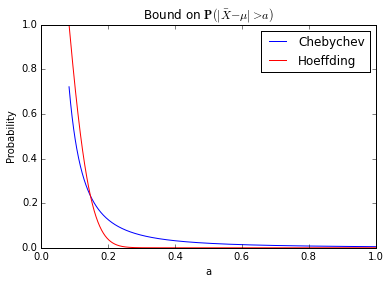

In [2]:
def chebychev(n, ssByn, a):
    return ssByn/(4.0 * n * np.square(a))

def hoeffding(n, ssByn, a):
    return 2*np.exp(-2.0 * n * np.square(a) / ssByn)

def chebychevHoeffdingBoundPlot(n, ssByn = 1.0, aMax = 1.0, pts = 1000):
    ''' 
       Plots the bounds on P( |\bar{X} - \mu | \ge a) for Chebychev's inequality and 
       Hoeffding's inequality.
       \bar{X} is the sample mean of n independent bounded random variables.
       ssBy is the mean sum of squares of the differences between the upper and lower bounds on 
       each of those n variables.
       Plots the curves as pts points
    '''
    fig, ax = plt.subplots(nrows=1, ncols=1)
    aMin = math.sqrt(-math.log(0.5)*ssByn/(2.0*n))  # smallest a for which Hoeffding bound is nontrivial
    x = np.linspace(aMin, aMax, pts+1)
    cheb, = plt.plot(x, np.fmin(1,chebychev(n, ssByn, x)), color='b', label='Chebychev')
    hoef, = plt.plot(x, hoeffding(n, ssByn, x), color='r', label='Hoeffding')
    plt.title(r'Bound on $\mathbf{P} (|\bar{X} - \mu| > a)$')
    plt.xlabel('a')
    plt.ylabel('Probability')
    plt.legend(loc = 'best')

interact(chebychevHoeffdingBoundPlot, n=widgets.IntSliderWidget(min=5, max=300, step=1, value=30),\
         ssByn = widgets.FloatSliderWidget(min=0.5, max=10, step=0.1, value=1.0),\
         aMax = widgets.fixed(1), pts = widgets.fixed(1000)
        )

## Using Hoeffding's inequality for confidence intervals

Suppose that $\{X_j \}_{j=1}^n$ are iid with support $[0, 1]$. 
Then $\tau = \sqrt{n}$.

<p class="gap01">
It follows that
$$
   A_\alpha(\theta) = \left [0, \theta + \sqrt{\frac{-\ln \alpha}{2n}} \right ]
$$
is the (one-sided) acceptance region for a level-$\alpha$ test of the hypothesis $\mu = \theta$;
$$
   \mathbb P_\mu \left (\bar{X} - \sqrt{\frac{-\ln \alpha}{2n}} \ge \mu \right ) \le \alpha;
$$
and 
$$\left [\bar{X} - \sqrt{\frac{-\ln \alpha}{2n}}, 1 \right ]$$ 
is a one-sided
confidence interval for $\mu$, with confidence level $1-\alpha$.
</p>

<p class="gap01">
Similarly,
$$
   A_\alpha(\theta) = 
   \left [\theta - \sqrt{\frac{-\ln \alpha/2}{2n}}, \theta + \sqrt{\frac{-\ln \alpha/2}{2n}} \right ]
$$
is the two-sided acceptance region for a level-$\alpha$ test of the hypothesis $\mu = \theta$;
$$
   \mathbb P_\mu \left ( \left | \bar{X} - \sqrt{\frac{-\ln \alpha/2}{2n}} \right | \ge \mu \right ) \le \alpha;
$$
and 
$$\left [\bar{X} - \sqrt{\frac{-\ln \alpha/2}{2n}}, \bar{X} + \sqrt{\frac{-\ln \alpha/2}{2n}} \right ]$$
is a two-sided
confidence interval for $\mu$, with confidence level $1-\alpha$.
</p>

<p class="gap01">
Let's compare Hoeffding confidence intervals and intervals based on the normal approximation by simulation, in the cases we saw previously in [Confidence intervals based on the normal approximation](normApprox.ipynb). We will use two-sided bounds, even though in applications one-sided bounds are often more interesting.
</p>

<p class="gap01">
Of course, if we know a priori that $\mu \in [\ell, u]$, the intersection of the Hoeffding
confidence interval with $[\ell, u]$ is still a $1-\alpha$ confidence interval.
</p>


In [3]:
# Population of two values, {0, 1}, in various proportions.  Amounts to Binomial random variable
ns = np.array([25, 50, 100, 400])  # sample sizes
ps = np.array([.001, .01, 0.1])    # mixture fractions, proportion of 1s in the population
alpha = 0.05  # 1- (confidence level)
reps = 1.0e4   # just for demonstration
vals = [0, 1]

simTable = pd.DataFrame(columns=('fraction of 1s', 'sample size', 'Student-t cov',\
                                 'Hoeffding cov', 'Student-t len', 'Trunc Hoeffding len'))
for p in ps:
    popMean = p
    for n in ns:
        tCrit = sp.stats.t.ppf(q=1-alpha/2, df=n-1)
        hCrit = np.sqrt(-math.log(alpha/2)/(2*n))
        sam = sp.stats.binom.rvs(n, p, size=reps)
        samMean = sam/float(n)
        samSD = np.sqrt(samMean*(1-samMean)/(n-1))
        coverT = (np.fabs(samMean-popMean) < tCrit*samSD).sum()
        lenT = 2*(tCrit*samSD).mean()
        lenH = (np.minimum(samMean+hCrit, 1.0)-np.maximum(samMean-hCrit, 0.0)).mean()
        coverH = (np.fabs(samMean-popMean) < hCrit).sum()
        simTable.loc[len(simTable)] =  p, n, str(100*float(coverT)/float(reps)) + '%', \
            str(100*float(coverH)/float(reps)) + '%',\
            str(round(lenT,4)),\
            str(round(lenH,4))
#
ansStr =  '<h3>Simulated coverage probability for Student-t and truncated Hoeffding confidence intervals for a {0, 1} population</h3>' +\
          '<strong>Nominal coverage probability ' + str(100*(1-alpha)) +\
          '%</strong>.<br /><strong>Estimated from ' + str(round(reps)) + ' replications.</strong>'
display(HTML(ansStr))
display(simTable)

,fraction of 1s,sample size,Student-t cov,Hoeffding cov,Student-t len,Trunc Hoeffding len
0,0.001,25,2.59%,100.0%,0.0043,0.2727
1,0.001,50,4.76%,100.0%,0.0039,0.193
2,0.001,100,9.97%,100.0%,0.004,0.1369
3,0.001,400,33.21%,100.0%,0.0035,0.0689
4,0.01,25,22.17%,100.0%,0.0382,0.2815
5,0.01,50,39.73%,100.0%,0.0353,0.2022
6,0.01,100,63.51%,100.0%,0.0307,0.1458
7,0.01,400,90.65%,100.0%,0.0188,0.0779
8,0.1,25,92.46%,100.0%,0.2329,0.3719
9,0.1,50,88.6%,99.99%,0.1676,0.2925


In [4]:
# Nonstandard mixture: a pointmass at zero and a uniform[0,1]
ns = np.array([25, 50, 100, 400])  # sample sizes
ps = np.array([0.9, 0.99, 0.999])    # mixture fraction, weight of pointmass
alpha = 0.05  # 1- (confidence level)
reps = 1.0e4   # just for demonstration

simTable = pd.DataFrame(columns=('mass at 0', 'sample size', 'Student-t cov',\
                                 'Hoeffding cov', 'Student-t len', 'Trunc Hoeffding len')
                       )

for p in ps:
    popMean = (1-p)*0.5  #  p*0 + (1-p)*.5
    for n in ns:
        tCrit = sp.stats.t.ppf(q=1-alpha/2, df=n-1)
        hCrit = np.sqrt(-math.log(alpha/2)/(2*n))
        coverT = 0
        coverH = 0
        totT = 0.0
        totH = 0.0
        for rep in range(int(reps)):
            sam = np.random.uniform(size=n)
            ptMass = np.random.uniform(size=n)
            sam[ptMass < p] = 0.0
            samMean = np.mean(sam)
            samSD = np.std(sam, ddof=1)
            coverT += ( math.fabs(samMean-popMean) < tCrit*samSD )
            totT += 2*tCrit*samSD
            coverH += ( math.fabs(samMean-popMean) < hCrit )
            totH +=  min(samMean+hCrit, 1.0)-max(samMean-hCrit, 0.0)
        simTable.loc[len(simTable)] =  p, n,\
            str(100*float(coverT)/float(reps)) + '%',\
            str(100*float(coverH)/float(reps)) + '%',\
            str(round(totT/float(reps),4)),\
            str(round(totH/float(reps),4))
#
ansStr =  '<h3>Simulated coverage probability of Student-t and truncated Hoeffding confidence intervals for ' +\
          'mixture of U[0,1] and pointmass at 0 population</h3>' +\
          '<strong>Nominal coverage probability ' + str(100*(1-alpha)) +\
          '%</strong>.<br /><strong>Estimated from ' + str(round(reps,0)) + ' replications.</strong>'

display(HTML(ansStr))
display(simTable)

,mass at 0,sample size,Student-t cov,Hoeffding cov,Student-t len,Trunc Hoeffding len
0,0.9,25,89.57%,100.0%,0.6363,0.3209
1,0.9,50,98.72%,100.0%,0.6685,0.2417
2,0.9,100,99.94%,100.0%,0.6816,0.1857
3,0.9,400,100.0%,100.0%,0.6859,0.1177
4,0.99,25,21.99%,100.0%,0.0968,0.2766
5,0.99,50,38.71%,100.0%,0.1271,0.1971
6,0.99,100,63.08%,100.0%,0.1614,0.1408
7,0.99,400,97.59%,100.0%,0.2104,0.0729
8,0.999,25,2.62%,100.0%,0.0113,0.2722
9,0.999,50,5.29%,100.0%,0.0156,0.1926


Remarkably, the truncated Hoeffding intervals are often _shorter_ on average than the Student-t intervals, but have far better coverage.

## More in this direction...

We could also apply other inequalities, such as Serfling's Inequality (a version of Hoeffding's inequality for sampling without replacement) or Feige's Inequality.

For sampling without replacement, the "Empirical Bernstein-Serfling Inequality" of Bardenet and Maillard (2013) seems particularly worth exploring.



## What's next?
Now we will consider some conservative methods for constructing lower confidence intervals for the mean of nonnegative populations

- [Next: Lower confidence bounds for the mean of a nonnegative population: Markov's Inequality and Methods based on the Empirical Distribution Function](markov.ipynb)
- [Previous: Confidence bounds for the mean of a bounded population: Binomial and Hypergeometric](binom.ipynb)
- [Index](index.ipynb)

In [5]:
%run talkTools.py